Installing required Libraries and packages

In [0]:
!pip install scikit-learn
!pip install 'nltk==3.4.5'

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449904 sha256=7df0bcdfb81788fceade2053a09d62f32070db883d93af0eb93639c24a43870c
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import re
from sklearn.model_selection import train_test_split

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from tensorflow.keras import layers

Using TensorFlow backend.


Loading the self created dataset from google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "drive/My Drive/Colab Dataset/Q2 Dataset.csv"
IMDBQ2 = pd.read_csv(path)

Pre-Processing of the dataset

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
X = []
sentences = list(IMDBQ2['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
y = IMDBQ2['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

70:30 splitting between training and validation

In [0]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.7, random_state=0)

In [0]:
len(X_train)

42

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val=tokenizer.texts_to_sequences(X_val)

Padding the data to maximum of 500 words

In [0]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)

Uploading the saved CNN-LSTM model from Question-1. Please note this model has been uploaded from the local drive.

In [0]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

Adding all parameters of our saved model

In [0]:
model = tf.keras.models.load_model('Q1CNN-LSTM.h5')

In [0]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 300, 64)           192000    
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 296, 64)           20544     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 148, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 541,505
Trainable params: 541,505
Non-trainable params: 0
_______________________________________________

Training the pre-processed model on our new data for training and validation

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=3)

Epoch 1/3
14/14 [==============================] - 6s 443ms/step - loss: 0.8846 - accuracy: 0.4524 - val_loss: 0.7611 - val_accuracy: 0.3889
Epoch 2/3
14/14 [==============================] - 6s 427ms/step - loss: 0.5669 - accuracy: 0.6429 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 3/3
14/14 [==============================] - 6s 409ms/step - loss: 0.4121 - accuracy: 0.9048 - val_loss: 0.7383 - val_accuracy: 0.5556


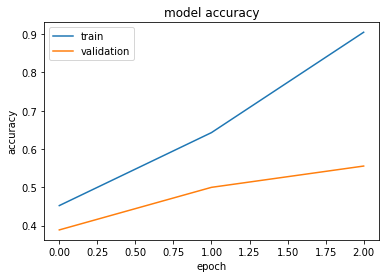

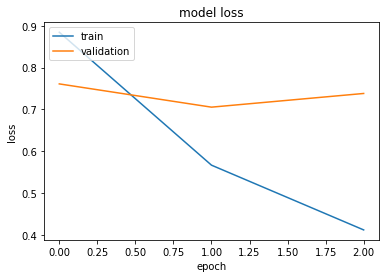

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

Saving the model to Local Drive

In [0]:
!pip install h5py
model.save('Q2Transfer.h5')

In [0]:
from google.colab import files
files.download("Q2Transfer.h5")